<div style="text-align: right"> Notebook by: Jules Morris</div>
<div style="text-align: right"> August 2022</div>

In [41]:
from imports_final import *

<h1 style = "border:10px; border-style:groove; border-color: midnightblue; padding: 1em; text-align: center;" >  Let's get Messi! <br> <img src = "ronaldo-messi.gif" width = "700" align = "center"> </h1>

<h1 style="border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Project Planning </h1>

- Acquire the FIFA data from the Kaggle.com website, save the data as .csv files and store the process as a function for replication. Save the function in an Acquire.py file to import into the Final Report Notebook.

- View data to gain understanding of the dataset and to create the readme and data dictionary.
    
- Create README.md with data dictionary, project and business goals, a slide show presentation, documentation of the initial hypotheses.
    
- Clean and prepare data for the first iteration through the data pipeline. Store this as a function to automate the process, store the function in the prepare.py module, and prepare data in Final Report Notebook by importing and using the function.

- Clearly define at least two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.

- Explore the overall data set and the field positions subsets.
   
- Establish a baseline accuracy and document well.

- Train three different regression models on the field positions.
    
- Evaluate models on train and validate datasets.
    
- Choose the model that performs the best and evaluate that single model on the test datasets.    

- Document executive summary, conclusions, takeaways, and next steps in the Final Report Notebook.

- Upload README.md, Data Dictionary, acquire.py, prepare.py, Draft Notebook, and Final Report Notebook.

<h1 style="border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Executive Summary </h1>

**Purpose:** 

- The purpose of this project was to discover which features are most important to predict the footballers salaries and to determine how best to use those features in a predictive model to accurately predict footballers salaries. Furthermore, we want to see if these factors are enough to determine the best players for depending on budget and essentially answer the question, can we spot a Messi in the making?

**Problem:** 

- Creating a salary prediction model for footballers is challenging due to the nature of the game, frequency of players playing multiple positions, the popularity and marketability of certain teams, leagues, and players, budget constraints, performance bonuses, injuries, and the clandestine nature of player contracts. Some factors are not readily quantifiable or hinge on predicted future footballer performance, while other factors follow a nonlinear relationship that can make accurate salary prediction even more challenging. 

**Analysis:**

- During the exploratory data analysis process we used statistical testing, clustering, recursive feature elimination, and feature engineering to determine which features are most important in a salary prediction model. 

- Results were improved uniformly when outliers were removed in trial modeling, though the results were negligible. Additionally, this does make salary prediction of star players challenging and potentially reduces the ability of the model to be robust to new data. 

**Solutions:**

- We used trained three regression models, Linear, Lasso + Lars, and a Generalized Linear Model using a Tweedie Regressor to see which model had the best predictive capacity to measure on the out of sample data. The regression models performed similarly with one another across the overall datasets and maintained the best performance even once the data was subset by field positions, resulting in the lowest overall Root Mean Squared Error and highest $R^{2}$ score. The best performing model was the Generalized Linear Model using a Tweedie Regressor, and the baseline was calculated by taking the average of the Root Mean Squared Error from the train and validation sets. This notebook focuses on the inclusive, overall dataset, individual in-depth analysis of the field positions are linked below.
<br/> <br/>
    - **Overall:**
    
        - RMSE Baseline: €20154.67
        
        - The features that were included in the overall model were:
        
            - International Reputation
            - Overall
            - Reactions
            - Potential
            
        - Test RMSE: €11095.90, which marked a 44.95% improvement from the original RMSE of this dataset.
<br/> <br/>    
    - **Forwards:** 
    
        - RMSE Baseline: €21889.30
        
        - The features included in this model:
        
            - Overall
            - Shooting
            - Ball control
            
        - Test RMSE: €12579.66, which marked a 42.53% improvement from the original RMSE of this dataset.
        - In this subset, predictive capacity did not show the same improvement as the inclusive overall model, it was beneficial for forwards to remain in the original dataset. 
<br/><br/>    
    - **<a href=" https://github.com/Jules-Ray-Kayla-Bert-Capstone-FiFA/fifa/blob/main/Midfielder_Exploration.ipynb">Midfielders:</a>**
        
        - RMSE Baseline: €21721.47
        
        - The features included in this model:
            
            - International reputation
            - Overall
            - Passing
            
        - Test RMSE: €11015.47, which marked a 49.29% improvement from the original RMSE of this dataset.
<br/><br/>
    - **<a href = "https://github.com/Jules-Ray-Kayla-Bert-Capstone-FiFA/fifa/blob/main/Defender%20Notebook%20copy.ipynb">Defenders:</a>**
    
        - RMSE Baseline: €19629.66
        
        - The features included in this model:
        
            - Overall
            - Defending
            
        - Test RMSE: €10524.00, which marked a 46.39% improvement from the original RMSE of this dataset.
<br/><br/>
    - **<a href= "https://github.com/Jules-Ray-Kayla-Bert-Capstone-FiFA/fifa/blob/main/Goalkeeper%20Notebook%20copy.ipynb">Goalkeepers:</a>**
        
        - RMSE Baseline: €15905.59
        
        - The features included in this model:
        
            - Overall
            - Goal keeping reflexes
            
        - Test RMSE: €9126.68, which marked a improvement 42.62% from the original RMSE of this dataset.

**Conclusion:**

- The exploration process revealed several nonlinear relationships, including a players overall score, their age, and their potential. Due to the lack of linearity, the linear regression model was less precise in predictions than was hoped for. For certain field positions such as midfielders and defenders, the test RMSE percentage improvement was greater than the inclusive dataset. Additionally, player salaries was not normally distributed, making predictions more challenging for regression models. Removing outliers is a strategy to reduce RMSE, though there is a trade-off, due to reducing the robustness of the model to new data. 

<h1 style="border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Acquire</h1>

In [42]:
#acquire
df = acquire.get_fifa_data()

<h1 style="border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Prepare </h1>

- The data originally contained 8 years of data, from FIFA 2015 - 2022, containing 142,079 rows and 111 columns. 
- After dropping the null values, cleaning the data, and adding features, 988804 and 84 columns remained.
-

In [43]:
#prepare
df = prepare_final.prepped_data(df)

In [38]:
df.loc[df['short_name'] == 'Neymar Jr']

sofifa_id short_name player_positions  overall  potential  \
1      190871  Neymar Jr          LW, CAM       91         91   
31     190871  Neymar Jr          LW, CAM       91         91   
60     190871  Neymar Jr          LW, CAM       92         92   

              value_eur             wage_eur  age  height_cm  weight_kg  \
1          129000000.00            270000.00   29        175         68   
31         132000000.00            270000.00   28        175         68   
60         105500000.00            290000.00   27        175         68   

           club_team_id            club_name     league_name  nationality_id  \
1                 73.00  Paris Saint-Germain  French Ligue 1              54   
31                73.00  Paris Saint-Germain  French Ligue 1              54   
60                73.00  Paris Saint-Germain  French Ligue 1              54   

   nationality_name club_position                   position field_position  \
1            Brazil            LW                  Left Wing        Forward   
31           Brazil            LW                  Left Wing        Forward   
60           Brazil           CAM  Centre Attacking Midfield     Midfielder   

   club_joined  club_contract_valid_until body_type preferred_foot  weak_foot  \
1   2017-08-03                    2025.00    Unique          Right          5   
31  2017-08-03                    2022.00    Unique          Right          5   
60  2017-08-03                    2022.00    Unique          Right          5   

    skill_moves  international_reputation    work_rate  pace  shooting  \
1             5                         5  High/Medium    91        83   
31            5                         5  High/Medium    91        85   
60            5                         5  High/Medium    91        85   

    passing  dribbling  defending  physical  crossing  finishing  \
1        86         94         37        63        85         83   
31       86         94         36        59        85         87   
60       87         95         32        58        87         87   

    heading_accuracy  short_passing  volleys  skill_dribbling  curve  \
1                 63             86       86               95     88   
31                62             87       87               95     88   
60                62             87       87               96     88   

    fk_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
1            87            81            95            93            89   
31           89            81            95            94            89   
60           87            81            95            94            89   

    agility  reactions  balance  shot_power  jumping  stamina  strength  \
1        96         89       84          80       64       81        53   
31       96         91       83          80       62       81        50   
60       96         92       84          80       61       81        49   

    long_shots  aggression  interceptions  positioning  vision  penalties  \
1           81          63             37           86      90         93   
31          84          51             36           87      90         92   
60          84          51             36           87      90         90   

    marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
1        35               32              29          9            9   
31       35               30              29          9            9   
60       27               26              29          9            9   

    gk_kicking  gk_positioning  gk_reflexes  gk_speed  year  \
1           15              15           11         0  2022   
31          15              15           11         0  2021   
60          15              15           11         0  2020   

             total_wage age_bins height_bins weight_bins  year_joined  \
1          129270000.00  younger      medium        slim         2017   
31         132270000.

<h1 style="border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Split Data </h1>

- The data split for this dataset was a bit unique to account for the number of years.

    - Train represents data from 2015 through 2019.
    - Validate represents data from 2020 through 2021.
    - Test represents data from 2022.

In [4]:
#train, test, split
train, validate, test = prepare_final.split(df)
print(train.shape, validate.shape, test.shape)

(58558, 84) (26216, 84) (14030, 84)


<h1 style="border-bottom: 10px groove marooon; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Explore</h1>

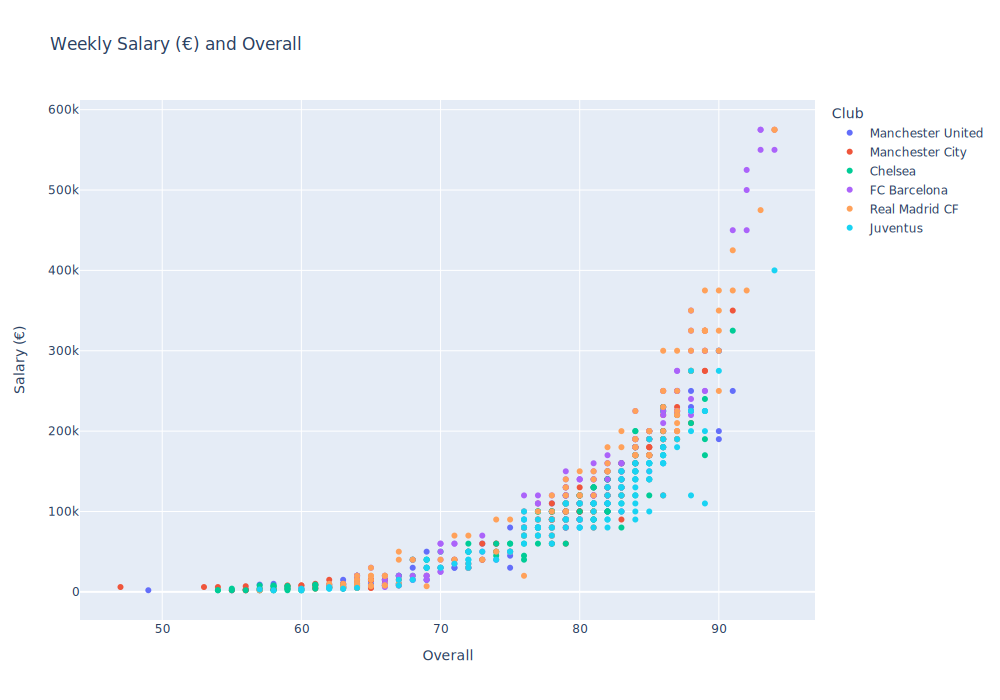

In [5]:
visuals_final.viz_1()

#### Takeaways: 

- Even when looking at the data without the limiting the selection to popular clubs, there is a clear exponential growth relationship between the highly correlated feature overall and footballers salaries.

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

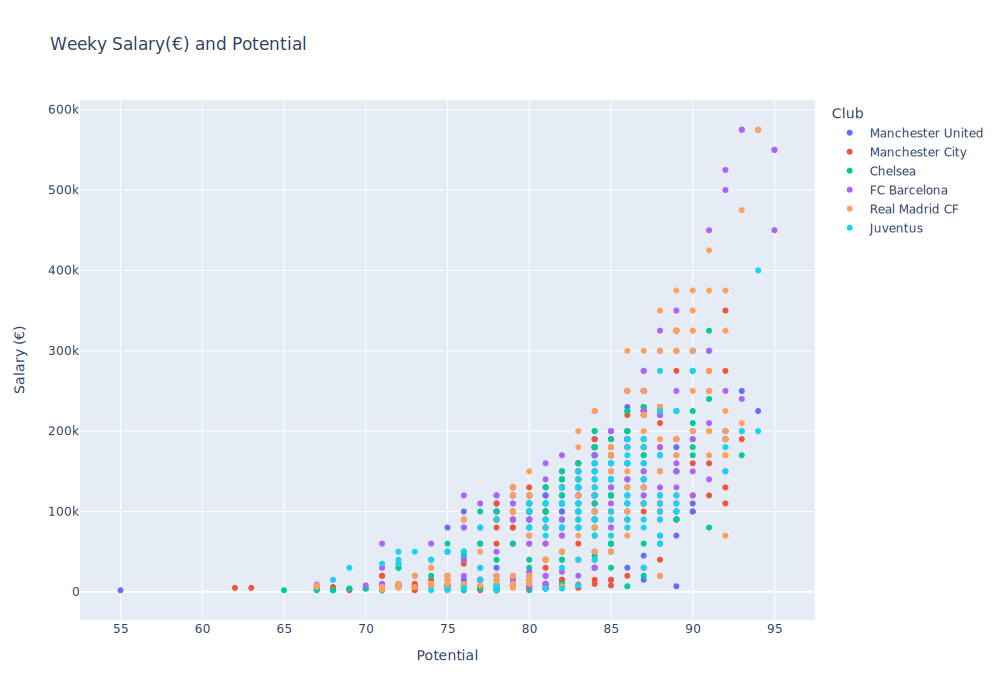

In [6]:
visuals_final.viz_2()

#### Takeaways:

- Potential, which was another highly correlated feature for salaries also shows a nonlinear, exponential growth pattern.

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

## Does age impact salary?

#### Kendall's $\tau$

$\alpha$ = .05

$𝐻_{0}$: There is no correlation between age and salary.

𝐻𝑎: There is a correlation between age and salary.

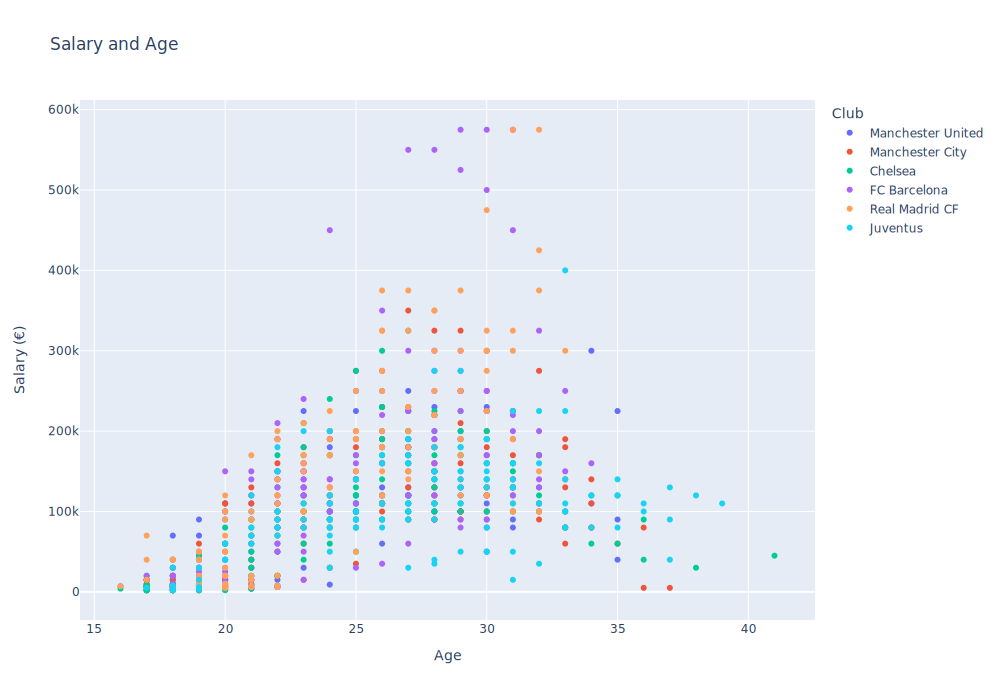

In [7]:
visuals_final.viz_3()

In [8]:
tests.age_stats()

τ: 0.262
P-Value: 0.000
Reject the null hypothesis.


#### Takeaways:

- Players wages increase until from the start of their professional career with a steady rise between ages 15 until 25, with salary peaks for the majority between 25 and 30 until approximately €250k, before gradually decreasing as a players age increases, this shows shows a nonlinear, quadratic, relationship.

- There is a positive correlation with player salaries and age.

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

## Does the seniority a player has on a team impact salary?

#### Kendall's $\tau$

$\alpha$ = .05

$𝐻_{0}$: There is no correlation between seniority and salary.

𝐻𝑎: There is a correlation between seniority and salary.

In [9]:
tests.seniority_stats()

τ: 0.097
P-Value: 0.000
Reject the null hypothesis.


#### Takeaways:
- The length of time does, have a weak positive correlation with a players salary.

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

## Does the league a player is with impact salary?

#### $Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: League and salary are independent.

𝐻𝑎: League and salary are not independent.

In [10]:
visuals_final.viz_4()

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

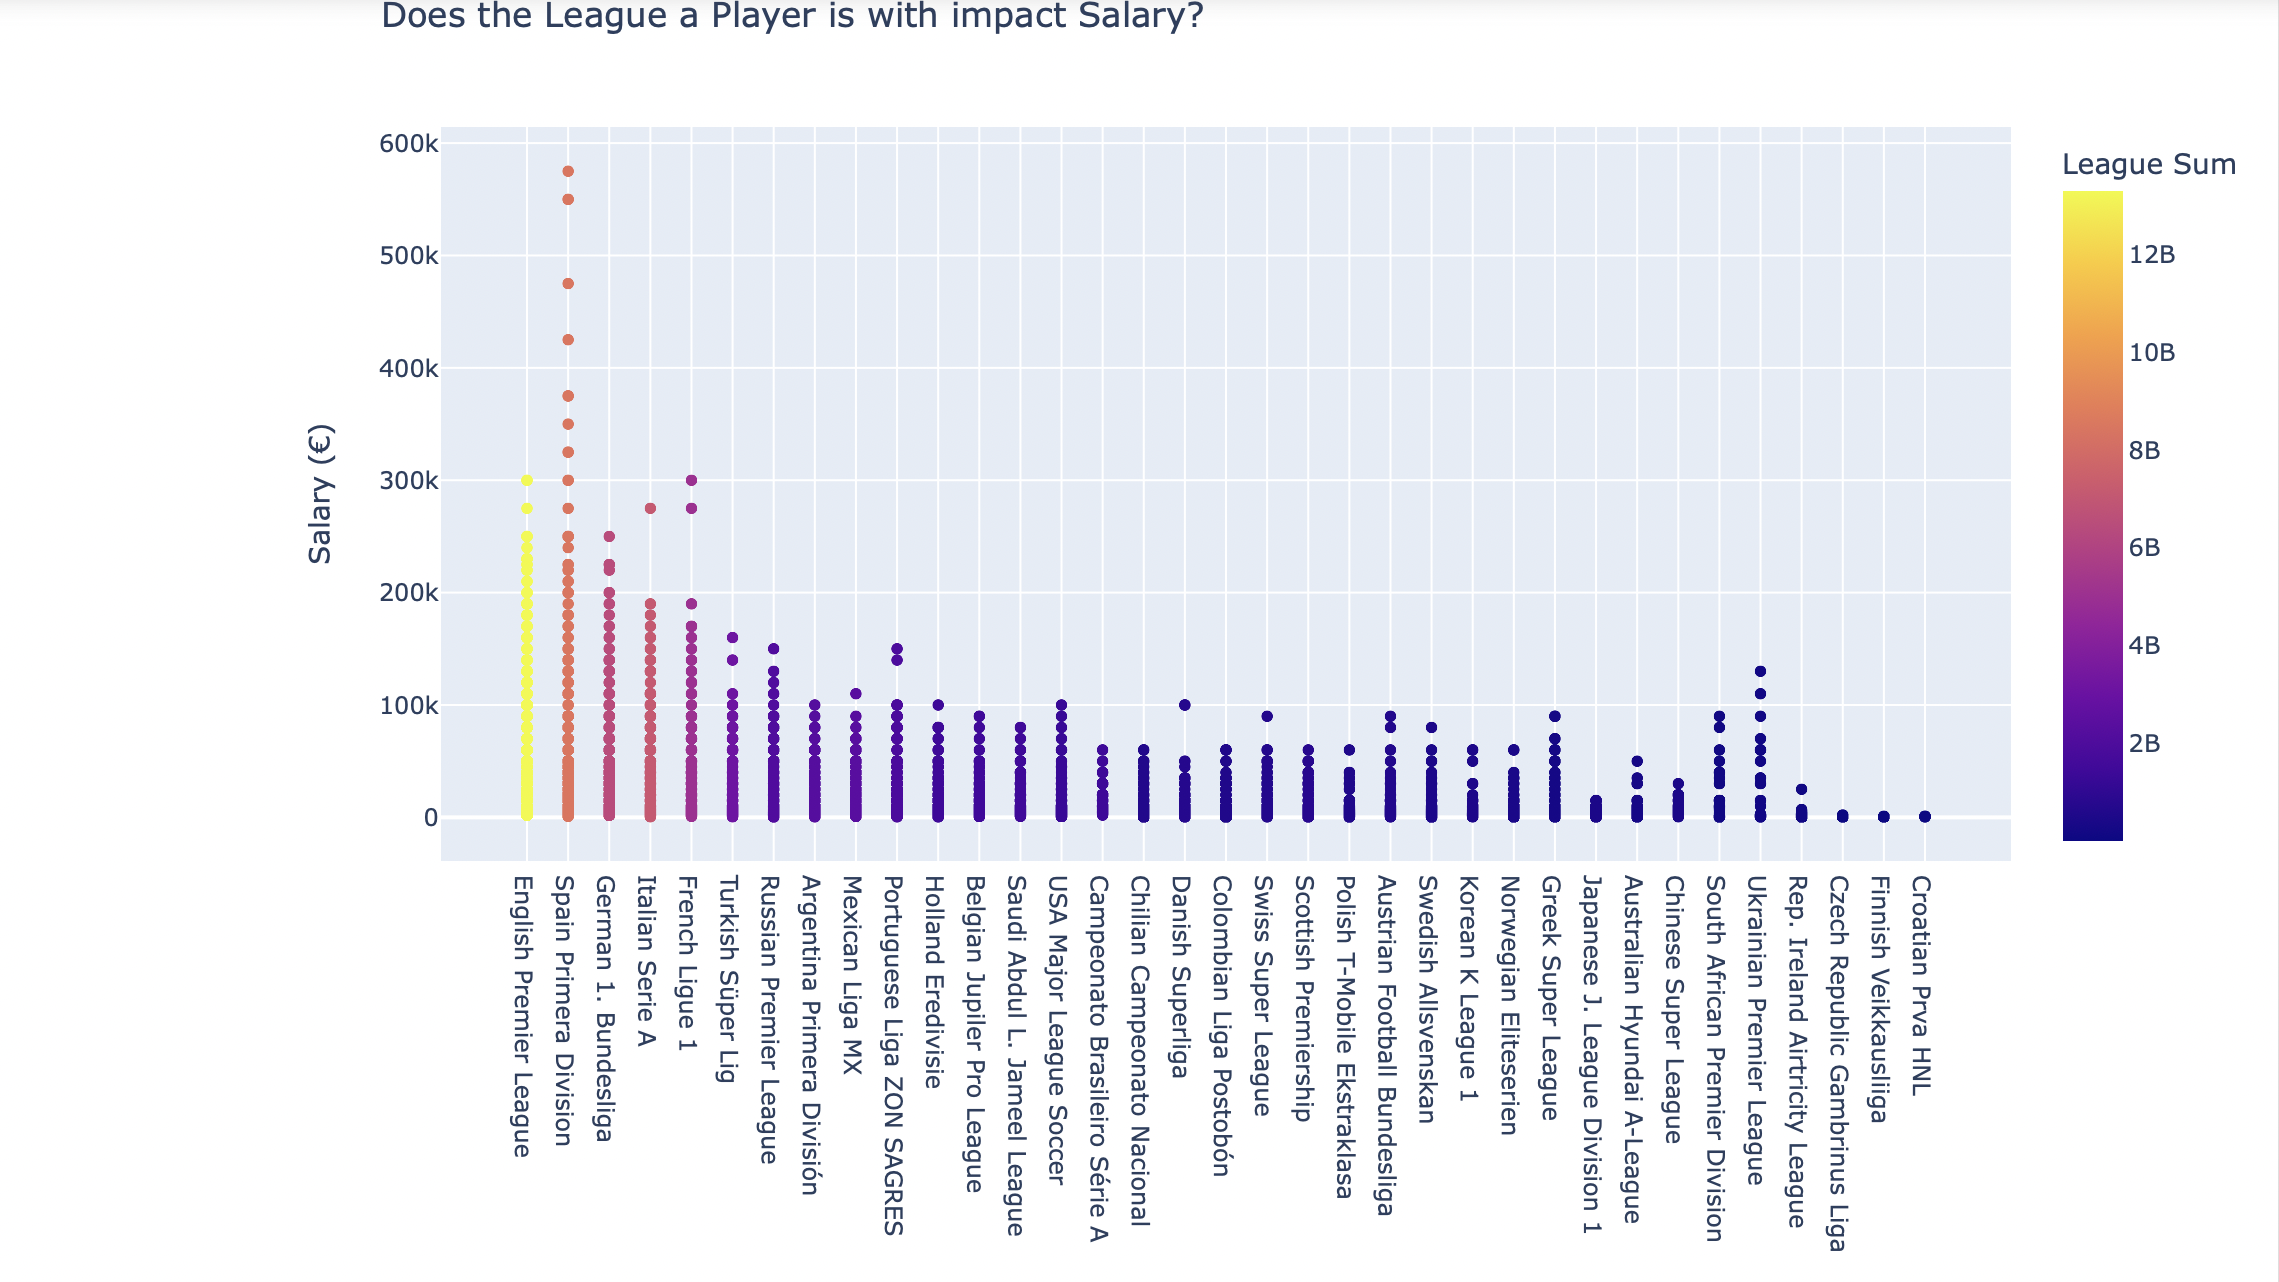

In [11]:
tests.league_stats()

P-Value: 0.000
Reject the null hypothesis.


#### Takeaways:
- Visually, Spain Primera Division (LaLiga) represents footballers with some of the highest average salaries throughout the years, contributing to the significant variations in player salaries, though other leagues such as the English Premier League and Italian Serie A, also represent a significant deviation in player salaries.

- Pay range varies the most for right wing players, though strikers come in a second, with wage variation.

- Even though LaLiga has some of the best paid players, the English Premier League still has the highest budget at €12B. 

- Statistical testing confirms there is a relationship between footballer salaries and which league they are with.

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

### Are the wages of Italian Serie A significantly higher than the mean wage of all leagues?

#### One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: Italian Serie A mean wages are <= than the combined mean wages of all the leagues.

𝐻𝑎: Italian Serie A mean wages are > than the combined mean wages of all the leagues.

In [12]:
tests.league_stats_ia()

P-Value: 0.000
Reject the null hypothesis.


#### Takeaways:
- Players with Italian Serie A have mean wages that are significantly higher than the mean wages of all the leagues.

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

## Does the club a player is in have a similar impact on wages?

### Are the wages of FC Barcelona significantly higher than the mean wage?

#### One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: FC Barcelona mean wages are <= than the combined mean wages.

𝐻𝑎: FC Barcelona mean wages are > than the combined mean wages of all the clubs.

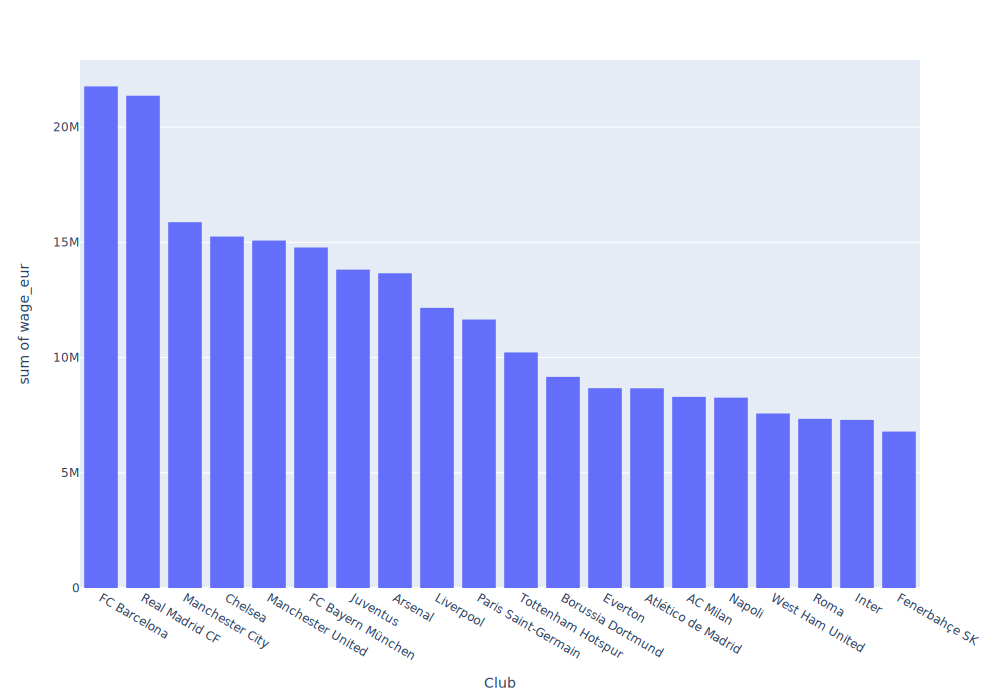

In [13]:
visuals_final.viz_6()

In [14]:
tests.club_stats()

P-Value: 0.000
Reject the null hypothesis.


#### Takeaways:
- FC Barcelona has significantly higher average wages than the other clubs.

- Starting with or remaining on a team with significantly higher mean wages will positively impact current and future salaries of a footballer.

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

### Do physical attributes impact player salaries?

#### $Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Body type and salary are independent.

𝐻𝑎: Body type and salary are not independent.

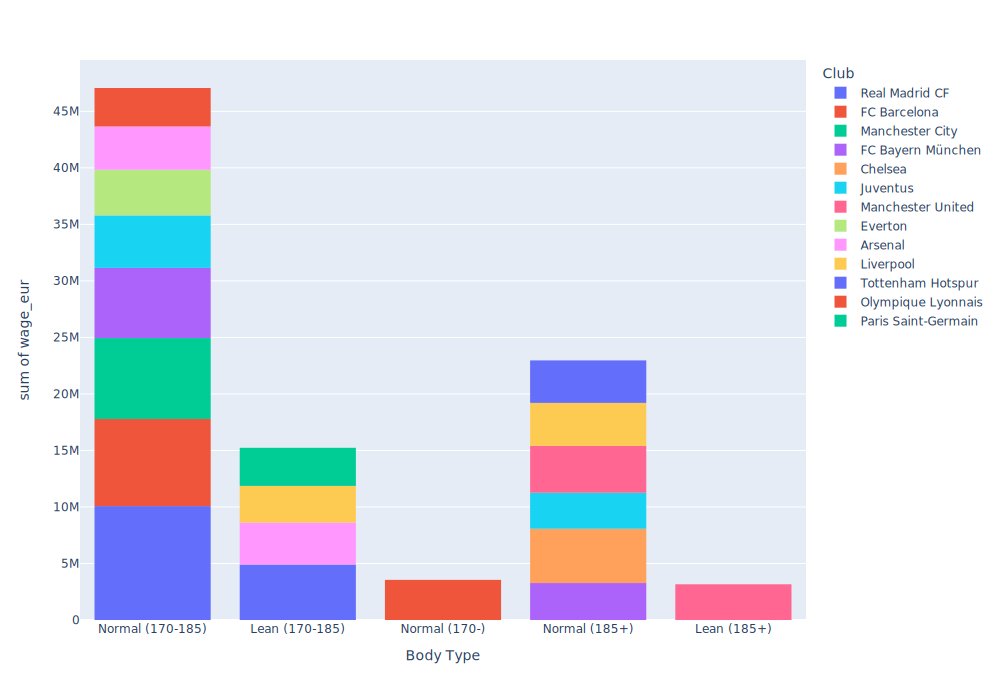

In [15]:
visuals_final.viz_7()

In [16]:
tests.body_stats()

P-Value: 0.000
Reject the null hypothesis.


#### Takeaways:

- There is some relationship between body type and salary, the majority body type is normal and represents €45M of player salaries for clubs that pay the highest salaries.

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

### Are the wages of players with normal body types significantly higher than the mean wage?

#### One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: Players with normal body types have mean wages that are <= than the combined mean wages of all players.

𝐻𝑎: Players with normal body types have mean wages that are > than the combined mean wages of all the players.

In [17]:
tests.body_tt()

P-Value: 0.017
Fail to reject the null hypothesis.


#### Takeaways: 

- Even though these players represent the vast majority of the dataset, the players with normal body types make less than or equal to the mean wages of all players.

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

### Are the salaries for those with unique body types significantly lower than the wages of those with normal body types?

#### Two Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: Players with unique body types mean salary is >= than the mean salary of players with normal body types.

𝐻𝑎: Players with unique body types mean salary is < than the mean salary of players with normal body types.

In [18]:
tests.body_tt_unique()

P-Value: 0.000
Reject the null hypothesis.


#### Takeaways:

- Players with unique body types have lower average salaries than those with normal body types, since they lack significant representation in the data, this outcome is expected.

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

### Is there a correlation between height and salary?

#### Kendalls's $\tau$

$\alpha$ = .05

$𝐻_{0}$: There is no correlation between height and salary.

𝐻𝑎: There is a correlation between height and salary.

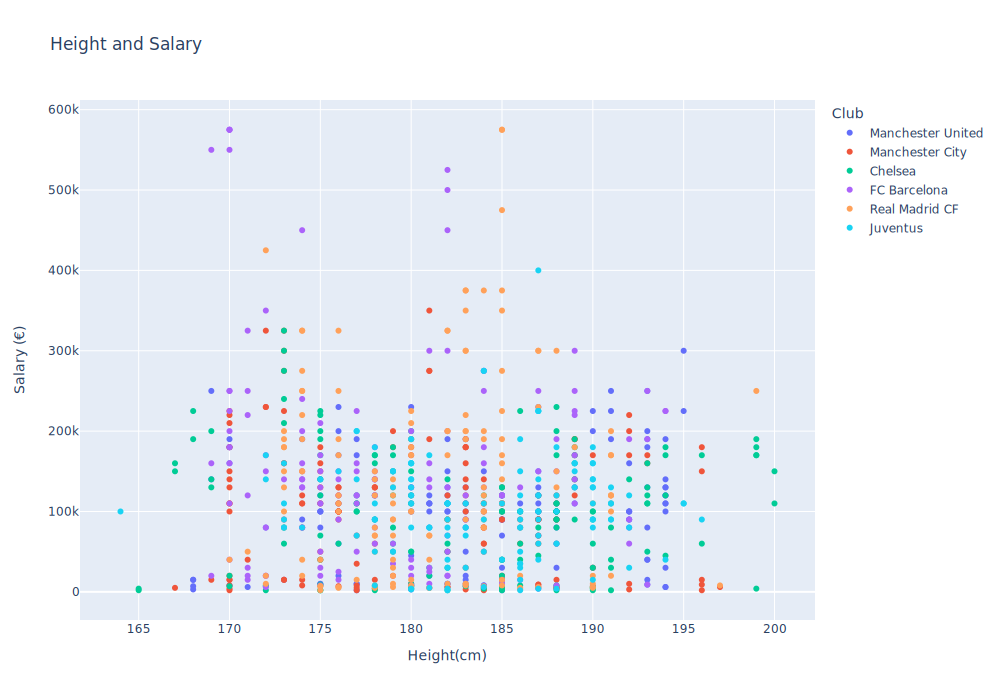

In [19]:
visuals_final.viz_8()

In [20]:
tests.body_height_k()

τ: 0.034
P-Value: 0.000
Reject the null hypothesis.


#### Takeaways:

- Height is not as strongly correlated with a footballers salary as it may be in other sports. 
    - Certain players, like Lionel Messi and Neymar, representing FC Barcelona are shorter than the average 181 cm of the dataset, yet represent some of the highest salaries.

- Though there is a negligible relationship between height and salary, it is unlikely to be helpful in building a predictive salary model.

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

### Is there a correlation between weight and salary?

#### Kendall's $\tau$

$\alpha$ = .05

$𝐻_{0}$: There is no correlation between weight and salary.

𝐻𝑎: There is a correlation between weight and salary.

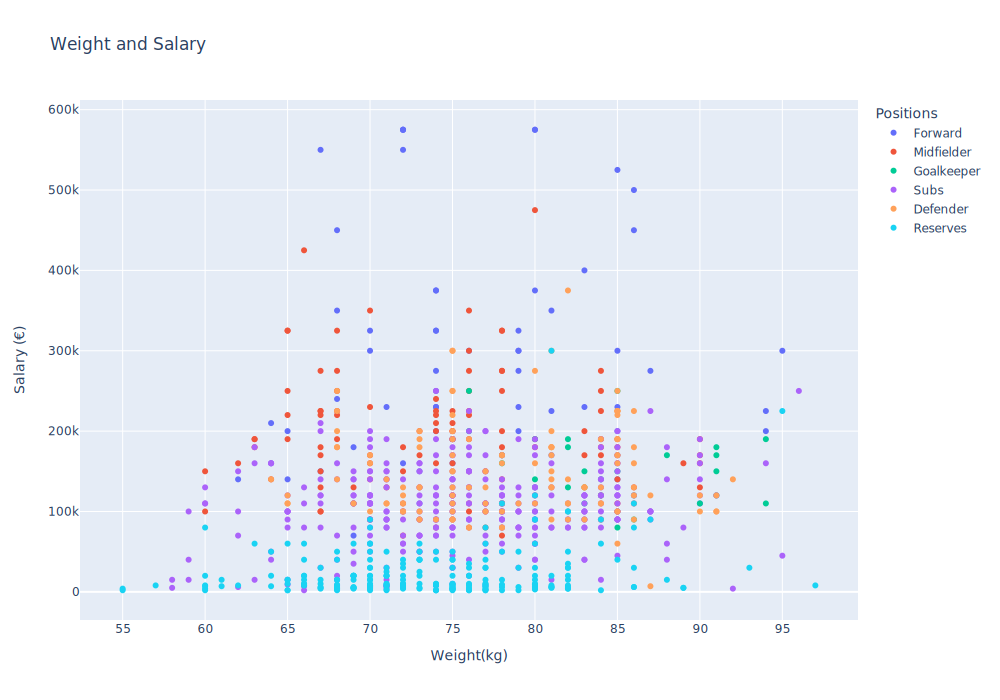

In [21]:
visuals_final.viz_9()

In [22]:
tests.body_weight_k()

τ: 0.072
P-Value: 0.000
Reject the null hypothesis.


#### Takeaways: 

- The average weight for footballers is 75 kg, but on the low end, stars like L.Messi and Neymar have high salaries, while on the heavier end, C.Ronaldo and L.Suárez contribute to higher salaries. 
    - All of the above players also play forward field positions, which has the highest average salary of all field positions, which is also likely a contributing factor.
    
- Statistically, there is some positive correlation between height and salary, though the correlation is not strong. 

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

## Does nationality impact salary?

#### Is there a relationship between nationality and salary?
$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Nationality and salary are independent.

𝐻𝑎: Nationality and salary are not independent.

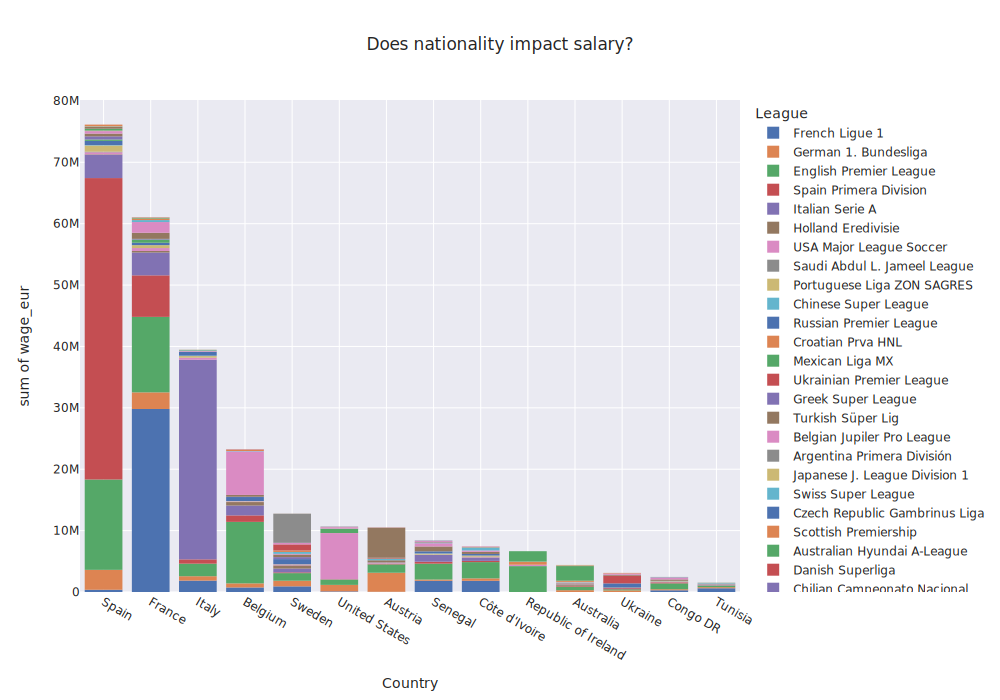

In [23]:
visuals_final.viz_10()

In [24]:
tests.nationality()

P-Value: 0.000
Reject the null hypothesis.


#### Takeaways: 

- There is a relationship between nationality and salary, some of the best playing leagues such as Spain Primera Division (LaLiga), French Ligue 1, and Italian Serie A, also have an overwhelming majority of players representative of their home countries playing in these leagues. 

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

## Does international reputation impact salary?

#### $Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: International reputation and salary are independent.

𝐻𝑎: International reputation and salary are not independent.

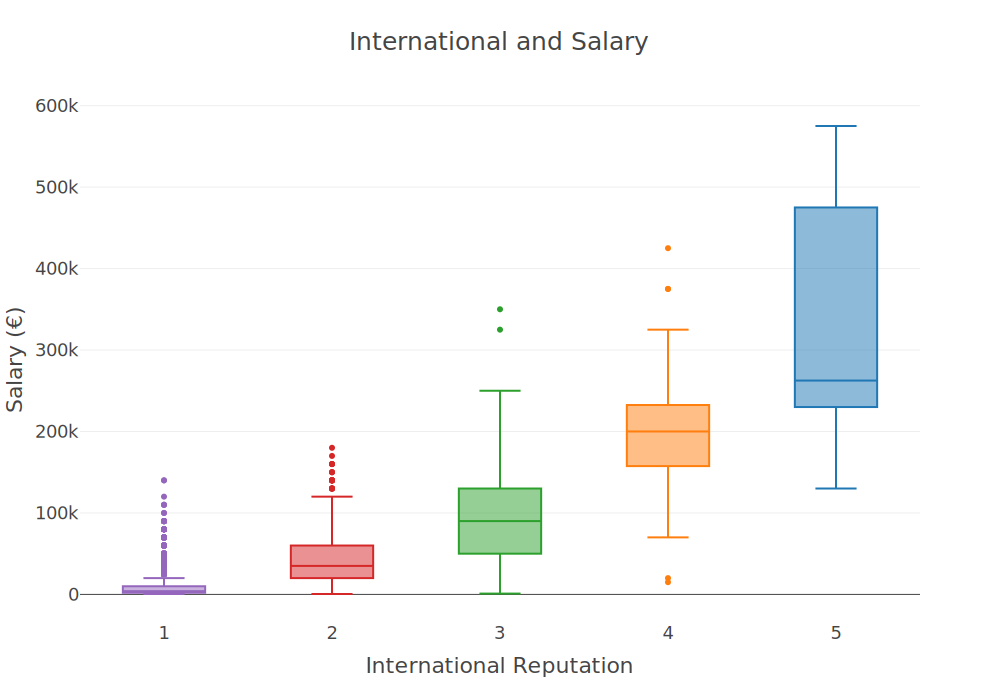

In [25]:
visuals_final.viz_11()

In [26]:
tests.reputation()

P-Value: 0.000
Reject the null hypothesis.


#### Takeaways:
- As players gain a higher international reputation score, their wages increase overall, with the greatest variation in salary being in the highest international reputation ranking.

- Statistically, there is a relationship between international reputation and salary.

## Does contract length positively or negatively impact salary?

#### $Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Contract and salary are independent.

𝐻𝑎: Contract and salary are not independent.

In [27]:
visuals_final.viz_12()

In [28]:
tests.seniority()

P Value: 0.000
Reject the null hypothesis.


#### Takeaways:
- There is a relationship between the length of time a player has been with a team and a footballers salary.

<hr style="border-top: 5px groove indianred; margin-top: 1px; margin-bottom: 1px"></hr>

## Exploration Summary

- There are several relationships that show a weak positive correlation to a player's salary. 
- Many features showed nonlinear relationships, which may make a linear regression model less predictive than desired.
- Certain traits like a player's international reputation are highly correlated with a players salary, so it may be beneficial to put them in the model.

---

<h1 style="border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Modeling Results </h1>

In [29]:
#acquire
df = acquire.get_fifa_data()
#prep
df = prepare_final.prepped_data(df)
#remove outliers
cols = ['overall'] 
df = final_modeling.handle_outliers(df,cols,1.5)

================================               OVERALL                 =====================================
Splitting data
Train: 58250 rows, 84 cols
Validate: 26082 rows, 84 cols
Test: 13961 rows, 84 cols
=========================================== Model for Overall Data =========================================
The features used for this model: ['international_reputation', 'overall', 'reactions', 'potential']
Baseline: wage_eur               13733.68
dtype: float64
RMSE using Mean
Train/In-Sample:  €21934.77 
Validate/Out-of-Sample:  €18374.57
RMSE using Median
Train/In-Sample:  €23609.56 
Validate/Out-of-Sample:  €18720.03
RMSE for GLM using Tweedie, power = 1 & α = 0
Training/In-Sample:  €11798.25 
Validation/Out-of-Sample:  €11743.29
Let's take a look at the numbers:
Train
                  wage_eur   wage_eur_pred_mean  wage_eur_pred_median  \
213              200000.00             13733.68               5000.00   
214              180000.00             13733.68               50

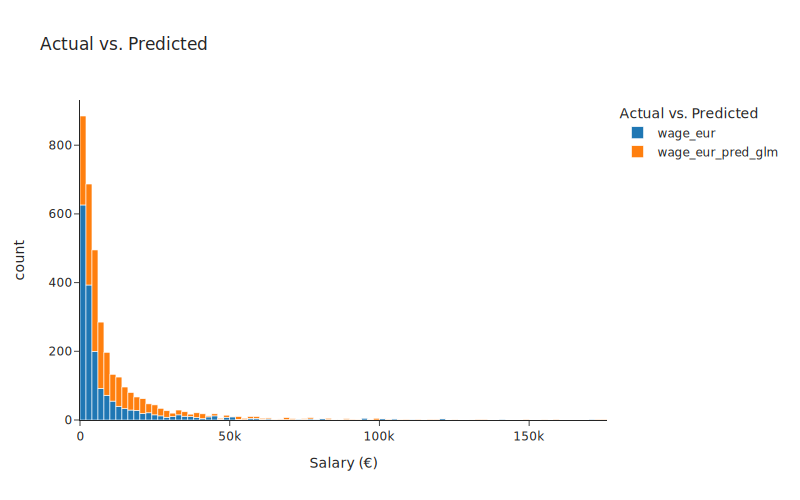

In [30]:
final_modeling.overall_modeling(df)

<h4 style="border-bottom: 5px groove indianred; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Modeling Summary </h1>

- Baseline: €13733.68
- RMSE Train Baseline: €21934.77
- RMSE Validate Baseline: €18374.57

- RMSE Baseline (Average): €20154.67

The GLM with a Tweedie Regressor was the best performing model, .

- Training/In-Sample: €11798.25
- Validation/Out-of-Sample: €11743.29
- Test performance: €11095.90

This model showed a 44.95% improvement from the established RMSE.

<h2 style="border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Forwards </h1>

================================               FORWARDS                  =====================================
Splitting data
Train: 10750 rows, 84 cols
Validate: 4966 rows, 84 cols
Test: 2628 rows, 84 cols
=======================================        Model Data            =========================================
The features used for this model: ['overall', 'shooting', 'ball_control']
Baseline: wage_eur               14916.74
dtype: float64
RMSE using Mean
Train/In-Sample:  €23525.93 
Validate/Out-of-Sample:  €20252.66
RMSE using Median
Train/In-Sample:  €25159.04 
Validate/Out-of-Sample:  €20694.20
RMSE for GLM using Tweedie, power = 1 & α = 0
Training/In-Sample:  €12779.16 
Validation/Out-of-Sample:  €13341.27
Let's take a look at the numbers:
Train
                  wage_eur   wage_eur_pred_mean  wage_eur_pred_median  \
213              200000.00             14916.74               6000.00   
217              140000.00             14916.74               6000.00   
451            

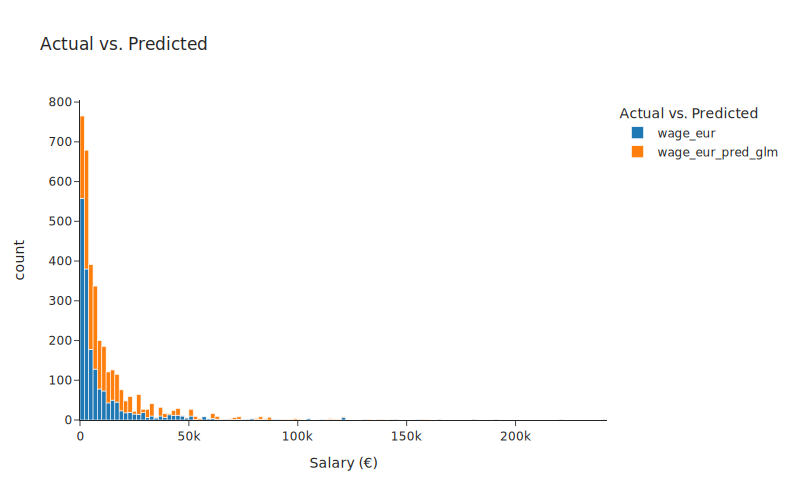

In [31]:
final_modeling.forwards_modeling(df)

<h4 style="border-bottom: 5px groove indianred; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Modeling Summary </h4>

- Baseline: €14916.74
- RMSE Train Baseline: €23525.93
- RMSE Validate Baseline: €20252.66

- RMSE Baseline (Average): €21889.30

The GLM with a Tweedie Regressor was the best performing model:

- Training/In-Sample: €11798.25
- Validation/Out-of-Sample: €13341.26
- Test performance: €12579.66

This model showed a 42.53% improvement from the established RMSE.

<h2 style="border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Midfielders </h2>

================================               MIDFIELDERS               =====================================
Splitting data
Train: 21755 rows, 84 cols
Validate: 9657 rows, 84 cols
Test: 5093 rows, 84 cols
=======================================        Model Data            =========================================
The features used for this model: ['international_reputation', 'overall', 'passing']
Baseline: wage_eur               14382.10
dtype: float64
RMSE using Mean
Train/In-Sample:  €22529.56 
Validate/Out-of-Sample:  €18913.37
RMSE using Median
Train/In-Sample:  €24405.02 
Validate/Out-of-Sample:  €19313.71
RMSE for GLM using Tweedie, power = 1 & α = 0
Training/In-Sample:  €11961.97 
Validation/Out-of-Sample:  €11588.24
Let's take a look at the numbers:
Train
                  wage_eur   wage_eur_pred_mean  wage_eur_pred_median  \
215              150000.00             14382.10               5000.00   
216              130000.00             14382.10               5000.00   
221 

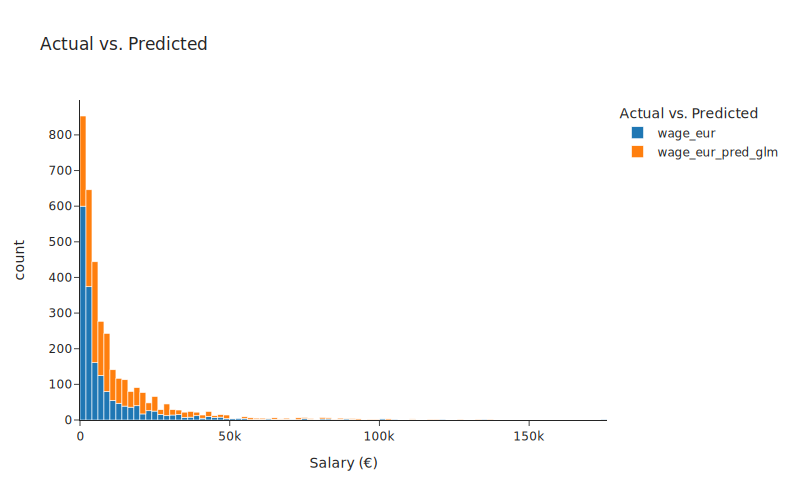

In [32]:
final_modeling.midfielder_modeling(df)

<h4 style="border-bottom: 5px groove indianred; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Modeling Summary </h4>

- Baseline: €14382.10
- RMSE Train Baseline: €22529.56
- RMSE Validate Baseline: €18913.37

- RMSE Baseline (Average): €20721.47

The GLM with a Tweedie Regressor was the best performing model:

- Training/In-Sample: €11961.97
- Validation/Out-of-Sample: €11588.24
- Test performance: €11015.47

This model showed a 46.84% improvement from the established RMSE.

<h2 style="border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Modeling Results </h2>

================================               DEFENDERS                 =====================================
Splitting data
Train: 19007 rows, 84 cols
Validate: 8513 rows, 84 cols
Test: 4633 rows, 84 cols
=======================================        Model Data            =========================================
The features used for this model: ['overall', 'defending']
Baseline: wage_eur               13457.25
dtype: float64
RMSE using Mean
Train/In-Sample:  €21176.49 
Validate/Out-of-Sample:  €18082.97
RMSE using Median
Train/In-Sample:  €22802.82 
Validate/Out-of-Sample:  €18457.23
RMSE for GLM using Tweedie, power = 1 & α = 0
Training/In-Sample:  €11034.79 
Validation/Out-of-Sample:  €10978.90
Let's take a look at the numbers:
Train
                  wage_eur   wage_eur_pred_mean  wage_eur_pred_median  \
218              160000.00             13457.25               5000.00   
224               80000.00             13457.25               5000.00   
225              100000.00    

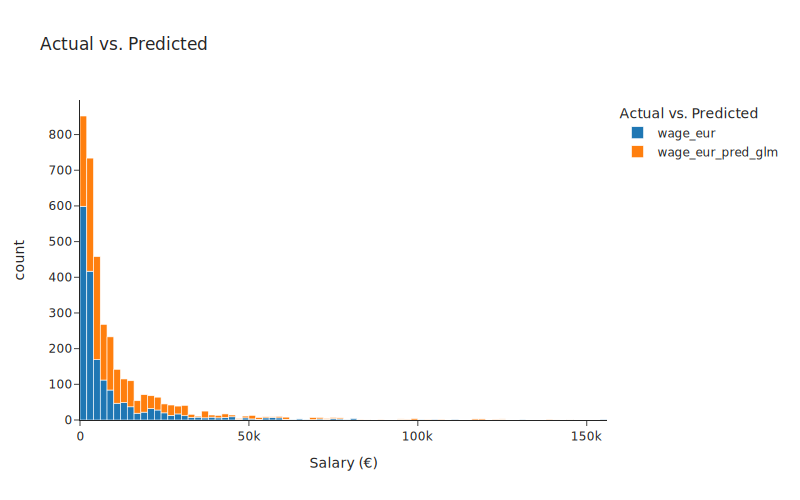

In [33]:
final_modeling.defender_modeling(df)

<h4 style="border-bottom: 5px groove indianred; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Modeling Summary </h4>

- Baseline: €13457.25
- RMSE Train Baseline: €21176.49
- RMSE Validate Baseline: €18082.97

- RMSE Baseline (Average): €19629.73

The GLM with a Tweedie Regressor was the best performing model:

- Training/In-Sample: €11034.79
- Validation/Out-of-Sample: €109878.90
- Test performance: €10524.00

This model showed a 46.39% improvement from the established RMSE.

<h2 style="border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Goalkeepers </h2>

================================              GOAL KEEPERS               =====================================
Splitting data
Train: 6738 rows, 84 cols
Validate: 2946 rows, 84 cols
Test: 1607 rows, 84 cols
=======================================        Model Data            =========================================
The features used for this model:  ['overall', 'gk_reflexes']
Baseline: wage_eur               10532.43
dtype: float64
RMSE using Mean
Train/In-Sample:  €18934.09 
Validate/Out-of-Sample:  €12877.09
RMSE using Median
Train/In-Sample:  €20377.37 
Validate/Out-of-Sample:  €12802.95
RMSE for GLM using Tweedie, power = 1 & α = 0
Training/In-Sample:  €10946.46 
Validation/Out-of-Sample:  €9913.01
Let's take a look at the numbers:
Train
                  wage_eur   wage_eur_pred_mean  wage_eur_pred_median  \
214              180000.00             10532.43               3000.00   
454               50000.00             10532.43               3000.00   
687               80000.00   

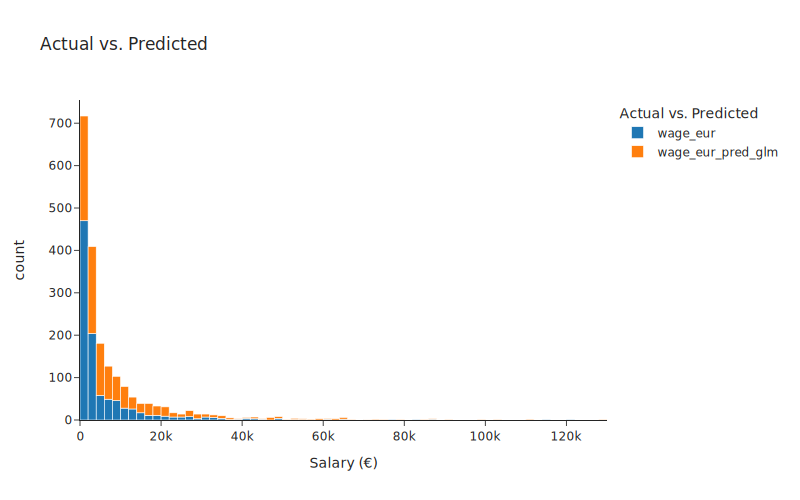

In [34]:
final_modeling.goalkeeper_modeling(df)

<h4 style="border-bottom: 5px groove indianred; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Modeling Summary </h4>

- Baseline: €10532.43

- RMSE Train Baseline: €18934.09
- RMSE Validate Baseline: €12877.09

- RMSE Baseline (Average): €15905.59

The GLM with a Tweedie Regressor was the best performing model:

- Training/In-Sample: €10946.46
- Validation/Out-of-Sample: €9913.01
- Test performance: €9126.68

This model showed a 42.62% improvement from the established RMSE.

---

<h1 style="border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Recommendations </h1>

- Use web scraping to add additional player statistics to merge with this dataset, that may provide more opportunities for a linear correlations.
- Add clusters as features to improve predictions.

<h1 style="border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 2px; text-align: left;">
Conclusion and Next Steps </h1>

- Splitting the data frame by field positions was beneficial for certain field positions, namely midfielders, defenders compared to the inclusive dataset, while the forwards and goal keepers did not achieve the same level of improvement as the overall model when compared to their RMSE baselines. Having nonlinear, but highly correlated features to salaries such as a players overall and potential made fitting a regression model challenging. For future iterations of this project, we would like to explore building different predictive models that are better suited to representing the highly correlated features well.

- With more time we would like to separate this further by clubs/leagues, create datasets based on individual player positions rather than field positions, and retain outliers to build a model robust to star players.